# Some Random SymPy Stuff

In [1]:
from sympy import *
init_printing()

# for older SymPy versions:
#%load_ext sympy.interactive.ipythonprinting

# for even older IPython/SymPy versions:
#%load_ext sympyprinting

In [2]:
x, y = symbols("x, y")

In [3]:
(pi + x)**2

In [4]:
eq = ((x + y)**2 * (x + 1))
eq

In [5]:
expand(eq)

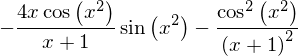

In [6]:
diff(cos(x**2)**2 / (1 + x), x)

In [7]:
x = Symbol('x', positive=True)
x > 0

True

In [8]:
exp(I * pi)

In [9]:
oo

In [10]:
a, b, c = symbols("a, b, c")

In [11]:
expand(sin(a + b), trig=True)

In [12]:
simplify(sin(x)**2 + cos(x)**2)

In [13]:
factor(x**3 + 6 * x**2 + 11*x + 6)

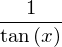

In [14]:
simplify(cos(x)/sin(x))

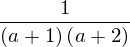

In [15]:
f1 = 1 / ((a + 1) * (a + 2))
f1

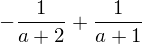

In [16]:
apart(f1)

In [17]:
z = Symbol('z')
f = sin(x*y) + cos(y*z)
f

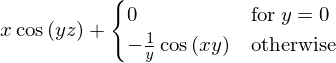

In [18]:
integrate(f, x)

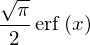

In [19]:
integrate(exp(-x**2), x)

In [20]:
integrate(exp(-x**2), (x, -oo, oo))

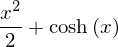

In [21]:
integrate(x + sinh(x), x)

In [22]:
diff(_, x)

In [23]:
limit(sin(pi * x) / x, x, 0)

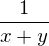

In [24]:
e = 1/(x + y)
e

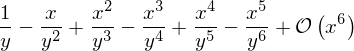

In [25]:
e.series(x)

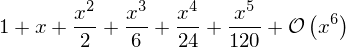

In [26]:
series(exp(x), x)

In [27]:
pi.evalf(100)

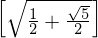

In [28]:
solve(x**4 - x**2 - 1, x)

In [29]:
solve([x + y - 1, x - y - 1], [x,y])

In [30]:
solve([x + y - a, x - y - c], [x,y])

In [31]:
var('m:q')

In [32]:
var('r:5')

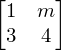

In [33]:
m = symbols('m')
M = Matrix([[1, m], [3, 4]])
M

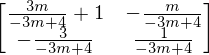

In [34]:
M.inv()

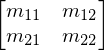

In [35]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")
A = Matrix([[m11, m12],[m21, m22]])
A

In [36]:
b = Matrix([[b1], [b2]])
b

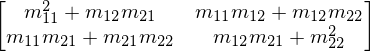

In [37]:
A**2

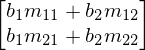

In [38]:
A * b

In [39]:
A.det()

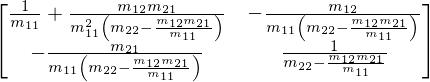

In [40]:
A.inv()

from https://github.com/sympy/sympy/wiki/Matrices-eigenvalues

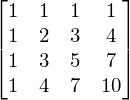

In [41]:
M = Matrix(4, 4, lambda i, j: i * j + 1)
M

In [42]:
M.eigenvals()

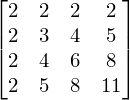

In [43]:
M = Matrix(4, 4, lambda i, j: i * j + 2)
M

In [44]:
M.eigenvals()

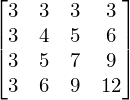

In [45]:
M = Matrix(4, 4, lambda i, j: i * j + 3)
M

In [46]:
M.eigenvals()

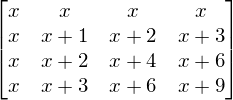

In [47]:
from sympy.abc import x
M = Matrix(4, 4, lambda i, j: i * j + x)
M

In [48]:
M.eigenvals()

from https://groups.google.com/forum/#!topic/sympy/mISLFQcEUIM

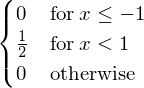

In [49]:
f = Piecewise((0, x <= -1), (Rational(1, 2), x < 1), (0, True))
f

In [50]:
#integrate(f.subs(x, x - y) * f(x), y)

In [51]:
integrate(Heaviside(x + 1) / 2 - Heaviside(x - 1) / 2, (x, -10, -5))

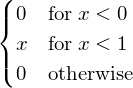

In [52]:
q=Piecewise((0, x < 0), (x, x < 1), (0, True))
q

In [53]:
q.args

from https://groups.google.com/forum/#!topic/sympy/tt8IA3y2sfQ

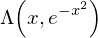

In [54]:
f = Lambda(x, exp(-x**2))
f

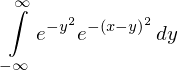

In [55]:
conv = Integral(f(x-y)*f(y), (y, -oo, oo))
conv

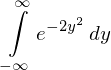

In [56]:
conv.subs({x:0})

In [57]:
l = lambdify(x, Integral(f(x), (x, -oo, oo)))
#l(3) # doesn't work!

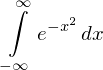

In [58]:
l = lambdify(x, Integral(f(x), (x, -oo, oo)), "sympy")
l(x)

from http://www.mare.ee/indrek/misc/convolution.pdf

In [59]:
import sympy.abc

# Convolute two "one-piece" functions. Arguments F and G
# are tuples in form (h(x) , a_h, b_h), where h(x) is
# the function and [a_h, b_h) is the range where the functions
# are non-zero.
def convolute_onepiece(x, F, G):
    f, a_f, b_f = F
    g, a_g, b_g = G
    # make sure ranges are in order, swap values if necessary
    if b_f - a_f > b_g - a_g:
        f, a_f, b_f, g, a_g, b_g = g, a_g, b_g, f, a_f, b_f
    y = sympy.Dummy('y')
    i = sympy.integrate(f.subs(x, y) * g.subs(x, x-y), y)
    return [
        (i.subs(y, x-a_g) - i.subs(y, a_f), a_f+a_g, b_f+a_g),
        (i.subs(y, b_f) - i.subs(y, a_f), b_f+a_g, a_f+b_g),
        (i.subs(y, b_f) - i.subs(y, x-b_g), a_f+b_g, b_f+b_g) ]

# Two "flat" functions, uniform centered PDFs
F=(sympify(0.5), -1, 1)
G=(sympify(0.05), -10, 10)
convolute_onepiece(sympy.abc.x, F, G)

from https://github.com/fperez/sympy/blob/master/sympy/solvers/tests/test_pde.py

In [60]:
from sympy import (Derivative as D, Eq, exp, sin, Function, Symbol, symbols, cos, log)

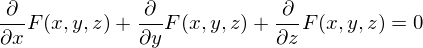

In [61]:
x, y, z, t = symbols("x,y,z,t")
c = Symbol("C", real=True)
Phi = Function('Phi')
F, R, T, X, Y, Z, u = map(Function, 'FRTXYZu')
r, theta, z = symbols('r,theta,z')

# Something simple :)
eq = Eq(D(F(x, y, z), x) + D(F(x, y, z), y) + D(F(x, y, z), z))
eq

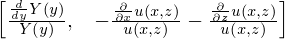

In [62]:
pde_separate_mul(eq, F(x, y, z), [Y(y), u(x, z)])

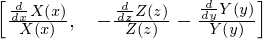

In [63]:
pde_separate_mul(eq, F(x, y, z), [X(x), Y(y), Z(z)])

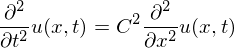

In [64]:
# wave equation
wave = Eq(D(u(x, t), t, t), c**2*D(u(x, t), x, x))
wave

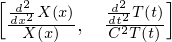

In [65]:
res = pde_separate_mul(wave, u(x, t), [X(x), T(t)])
res

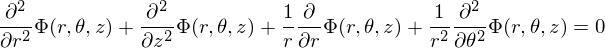

In [66]:
# Laplace equation in cylindrical coords
eq = Eq(1/r * D(Phi(r, theta, z), r) + D(Phi(r, theta, z), r, 2) +
        1/r**2 * D(Phi(r, theta, z), theta, 2) + D(Phi(r, theta, z), z, 2))
eq

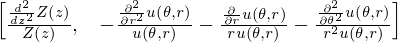

In [67]:
# Separate z
res = pde_separate_mul(eq, Phi(r, theta, z), [Z(z), u(theta, r)])
res

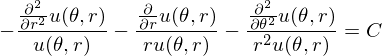

In [68]:
# Lets use the result to create a new equation...
eq = Eq(res[1], c)
eq

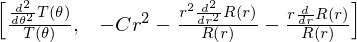

In [69]:
# ...and separate theta...
res = pde_separate_mul(eq, u(theta, r), [T(theta), R(r)])
res

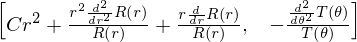

In [70]:
# ...or r...
res = pde_separate_mul(eq, u(theta, r), [R(r), T(theta)])
res

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span resource="[_:publisher]" rel="dct:publisher">
    <span property="dct:title">Matthias Geier</span></span>
  has waived all copyright and related or neighboring rights to
  this work.
</p>